## Class exercise slicing dataframe
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result: (Hint: print(df);print(df.index);print(df.columns):     

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```
(Hint: use the pd.DataFrame(data=, column=, index=) arguments)

2. Make slices of data:
   1. second column using column name
   2. third column using column index (.iloc[])
   3. slice element at third row of second column (use .iloc())

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])

#Exercise 1:

#print(data[1:,1:])
#print(data[1:,0])
#print(data[0, 1:])

exercise = pd.DataFrame(data[1:,1:], index=data[1:,0], columns=data[0,1:])
print(exercise, "\n")
print(exercise.index, "\n")
print(exercise.columns, "\n")

print("--------------------------------------------------------------------------\n")
#End of exercise 1 --------------------------------------------------------------------------------


#Exercise 2:

print("A:")
print(exercise['Col1'], "\n")

print("B:")
print(exercise.iloc[0:,2], "\n")


print("C:")
print(exercise.iloc[2,1])


     Col1 Col2 col3
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9 

Index(['Row1', 'Row2', 'Row3'], dtype='object') 

Index(['Col1', 'Col2', 'col3'], dtype='object') 

--------------------------------------------------------------------------

A:
Row1    1
Row2    4
Row3    7
Name: Col1, dtype: object 

B:
Row1    3
Row2    6
Row3    9
Name: col3, dtype: object 

C:
8


## Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014
1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups) (hint:  [ISO 3166, Alpha-3 country codes](https://www.iban.com/country-codes)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

In [2]:
#Exercise 1

import requests
import zipfile

url = 'http://api.worldbank.org/v2/en/indicator/EN.ATM.CO2E.KT?downloadformat=csv'
response = requests.get(url)

# get the filename
fname = response.headers['Content-Disposition'].split('=')[1]
fname = 'data/'+fname
# write content to file (zip file writing bytes)
if response.ok:  # status_code == 200:
    with open(fname, 'wb') as f:
        f.write(response.content)

# extract content of zip file in current folder
zipfile.ZipFile(fname, 'r').extractall('./data')

In [3]:
#Exercise 1

data = pd.read_csv('data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2056082.csv', skiprows=4)
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.675,11576.719,12713.489,12178.107,11840.743,10623.299,...,1349.456,861.745,872.746,898.415,883.747,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,10755.311,9050.156,8467.103,9035.488,8672.455,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,34176.440,33692.396,44851.077,34583.477,34693.487,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4924.781,4913.780,5489.499,4616.753,4536.079,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,487.711,476.710,462.042,465.709,469.376,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,7942.722,8074.734,7260.660,8408.431,8943.813,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,58.672,73.340,69.673,80.674,99.009,102.676,...,18698.033,25492.984,24667.909,13171.864,10608.631,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,97934.569,102213.958,105767.281,109826.650,119657.877,128260.659,...,464674.906,459222.077,484495.041,463952.507,476643.994,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,3278.298,3916.356,...,3678.001,3956.693,4503.076,4532.412,5141.134,NaN,NaN,NaN,NaN,NaN


In [4]:
#Exercise 1.1

data = data.set_index('Country Name')
data['2014']

Country Name
Aruba              872.746
Afghanistan       8467.103
Angola           44851.077
Albania           5489.499
Andorra            462.042
                   ...    
Kosovo            7260.660
Yemen, Rep.      24667.909
South Africa    484495.041
Zambia            4503.076
Zimbabwe         12115.768
Name: 2014, Length: 264, dtype: float64

In [5]:
#Exercise 1.2

sorted_2014 = data['2014'].sort_values(ascending=False)
sorted_2014[:10]

Country Name
World                        3.410319e+07
IDA & IBRD total             2.155943e+07
Low & middle income          2.110046e+07
Middle income                2.091510e+07
IBRD only                    2.073197e+07
Upper middle income          1.693238e+07
Late-demographic dividend    1.509443e+07
East Asia & Pacific          1.413107e+07
High income                  1.298539e+07
OECD members                 1.220186e+07
Name: 2014, dtype: float64

In [6]:
#Exercise 1.3

# remove regions and aggregations
countries = pd.read_csv('../../data/country_codes.csv', sep='\t', header=None)
alpha3 = countries[2].str.strip()
alpha3 = list(alpha3)
print(alpha3[:4])
filtered_data = data[data['Country Code'].isin(alpha3)]
filtered_data['2014'].sort_values(ascending=False)[:10]

['AFG', 'ALB', 'DZA', 'ASM']


Country Name
China                 1.029193e+07
United States         5.225413e+06
India                 2.232730e+06
Russian Federation    1.736985e+06
Japan                 1.206674e+06
Germany               7.203638e+05
Iran, Islamic Rep.    6.523923e+05
Saudi Arabia          6.010470e+05
Korea, Rep.           5.871564e+05
Canada                5.406148e+05
Name: 2014, dtype: float64

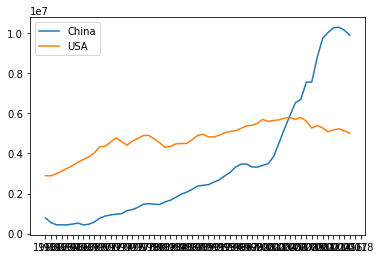

In [7]:
#Exercise 1.4

# Plot the emissions of China and USA over time respectively
china = data.loc['China'][3:]
usa = data.loc['United States'][3:]
plt.plot(china.index,china,label='China')
plt.plot(usa.index,usa,label='USA')
plt.legend()

## Class Exercise
Go here and get csv data: [worldbank military expanditure](https://databank.worldbank.org/reports.aspx?source=2&series=MS.MIL.XPND.CD&country=#)
1. For 2018 find the 10 countries with the highest military expenditure in USD
2. For 2018 find the 10 countries with the highest military expenditure per capita [worldbank](https://databank.worldbank.org/source/world-development-indicators/preview/on#)(use series='Population,Total' and time='2018' and Countries= all 2017) or use [copy paste with this date into excel](https://www.worldometers.info/world-population/population-by-country/)
  - (Hint: use pd.merge() to merge the mil_exp dataframe with the population dataframe on 2 columns (country_code)
3. For 2018 find the 3 countries with the highest per capita military expenditure in the middle east
  - [countries list with iso code](middleeast_countries.csv)

In [8]:
#Exercise 1.1

military_data = pd.read_csv('data/9ca7fea2-d121-40ae-b0d0-d0e1ddf54584_Data.csv')
military_data

,Series Name,Series Code,Country Name,Country Code,1990 [YR1990],2000 [YR2000],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
0,Military expenditure (current USD),MS.MIL.XPND.CD,Afghanistan,AFG,..,..,325807003.657989,238583385.374322,217194107.113298,268227074.235808,199518614.831897,185878310.062383,191407113.244397,198074728.574408,226874362.206615,..
1,Military expenditure (current USD),MS.MIL.XPND.CD,Albania,ALB,..,45362503.3922719,197006789.236335,183204695.660212,180015508.820867,178120368.027763,132350667.590834,130853162.620284,144382688.719935,175886688.575874,197517156.015072,..
2,Military expenditure (current USD),MS.MIL.XPND.CD,Algeria,DZA,904269155.155841,1881163649.11945,8652237040.00252,9326287144.03632,10161588239.1481,9724379971.92326,10412714002.8964,10217081699.5693,10073364021.3013,9583724288.3703,10303600575.2107,..
3,Military expenditure (current USD),MS.MIL.XPND.CD,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..
4,Military expenditure (current USD),MS.MIL.XPND.CD,Andorra,AND,..,..,..,..,..,..,..,..,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#Exercise 1.1

military_data_countries = military_data.set_index('Country Name')
ten_highest = military_data_countries['2018 [YR2018]'].sort_values(ascending=False)[0:11]
ten_highest

Country Name
Croatia                                          966358716.798887
Bulgaria                                         961297274.594496
Mongolia                                         96067489.8598111
Algeria                                           9583724288.3703
Europe & Central Asia (excluding high income)    94095762670.7511
Heavily indebted poor countries (HIPC)           9089622543.56992
Eswatini                                         90802432.5474614
Benin                                            90212425.9945842
Tunisia                                          844227367.128514
South Asia (IDA & IBRD)                          83787833238.5625
South Asia                                       83787833238.5625
Name: 2018 [YR2018], dtype: object

In [10]:
#Exercise 1.2

